In [92]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
bench = BenchmarkSet("iaml_ranger", active_session=False, check=False)
bench.config.config["model"] = "model_v1_9.onnx"
bench.active_session
bench.set_session()

In [129]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [130]:
def plot_true_lc(ccs, target):
    # Subset data to obtain learning curve for config
    for cc in ccs:
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        config = pd.DataFrame(data = x, index = [0])
        config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
        pdf = df.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(pdf[bench.config.fidelity_params[0]], pdf[target], marker = "o", linestyle="None")

In [133]:
def plot_lc(ccs, target, fidelity_sequence):
    for cc in ccs:
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        if bench.config.config_id == "iaml_ranger":
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res)

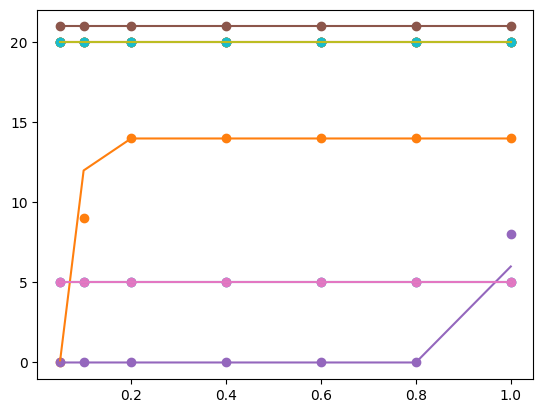

In [137]:
# Draw a sample configuration
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
ccs = [df.sample(1).to_dict() for i in range(10)]
target = "nf"
fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
plot_true_lc(ccs, target=target)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)